***
***
# <div align="center"><font color='darkred'><b>FINAL PROJECT</b></font></div>
***
# <div align="center"><font color='darkred'><b>ANN</b></font></div>
***
# <div align="center"><font color='indigo'><b>AI-J</b></font></div>
***
# <div align="center"><font color='darkred'><b>GROUP DETAILS:</b></font></div>
### <div align="center"><font color='indigo'><b>MISHA FAKHAR 21I-2718</b></font></div>
### <div align="center"><font color='indigo'><b> AREEBA FATAH 21I-0349</b></font></div>
***
***
\

# IMPORTING  NECESSARY LIBRARIES

In [146]:
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader

In [147]:
from PIL import Image,ImageDraw,ImageFont
import re
import numpy as np
import pandas as pd
import os

In [148]:
import cv2
import math
import keras_ocr

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from rembg import remove

In [149]:
import spacy
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, accuracy_score

In [150]:
import torch.optim as optim
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from keras.layers import Input, Dense, concatenate, Reshape, Attention
from keras.models import Model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from keras import backend as K

# Loading Images

In [144]:
image_folder=r'D:\memesdataset\images\images'                      # SET FOLDER
images=[]                                                       # FOR STORING IMAGES
image_paths=[]                                                  # FOR STORING IMAGES VALUES
for filename in os.listdir(image_folder)[:100]:                 # READING IMAGES
    if filename.endswith(('.jpg','.jpeg','.png')):              # ALLOWED FORMATS
        image_path=os.path.join(image_folder,filename)
        image=Image.open(image_path)
        images.append(image)
        image_paths.append(image_path)
print("Number of images loaded:", len(images))                  # PRINT LOADED IMAGES

Number of images loaded: 100


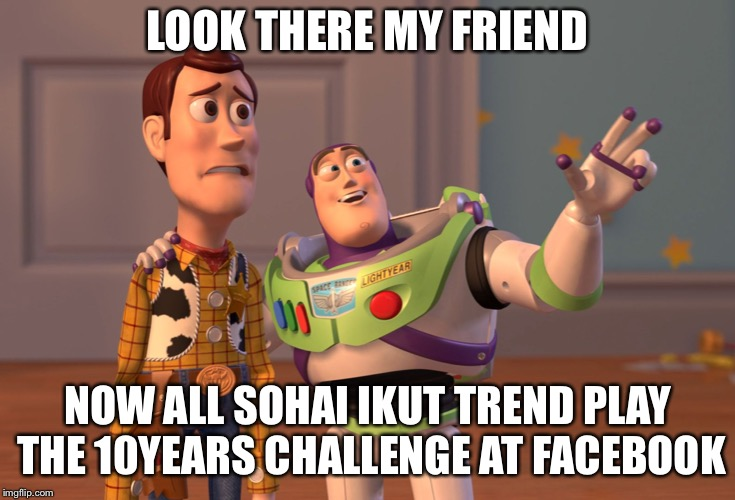

In [8]:
display(images[0])                                             # DISPLAYING AN IMAGE

# Loading Textual Dataset

In [151]:
csv_file=r'D:\memesdataset\labels.csv'
meme_data=pd.read_csv(csv_file,skipfooter=5)
meme_texts=meme_data["text_corrected"][:100]
print("Number of texts loaded:",len(meme_texts))
label_map={'very_negative':2,'very_positive':1,'neutral':3,'negative':2,'positive':1}
labels=meme_data["overall_sentiment"].replace(label_map)[:100]
print("Number of labels loaded:",len(labels),end="\n\n")
print(meme_texts[:2])

Number of texts loaded: 100
Number of labels loaded: 100

0    LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...
1    The best of #10 YearChallenge! Completed in le...
Name: text_corrected, dtype: object


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


# TEXT ONLY PART

# Part 1: Classification

# Preprocessing

In [10]:
def preprocess_text(text):                                  # Checking if the input is a string
    if isinstance(text,str):
        text=re.sub(r'[^\w\s]','',text)
        text=re.sub(r'\b(?:AM|PM|am|pm)\b','',text)
        text=re.sub(r'@\w+\s?','',text)
        text=text.lower()
        return text
    else:
        return ""
cleaned_texts=[preprocess_text(text) for text in meme_texts]

# Classifier

In [11]:
meme_texts_cleaned=[preprocess_text(text) for text in meme_texts[:100]]
meme_texts_filled=pd.Series(meme_texts_cleaned).fillna('1')                 # filling nan values with 1

X_train,X_test,y_train,y_test=train_test_split(meme_texts_filled,labels,test_size=0.4,random_state=65)
vectorizer=TfidfVectorizer()
X_train_vectorized=vectorizer.fit_transform(X_train)
X_test_vectorized=vectorizer.transform(X_test)

classifier=AdaBoostClassifier(n_estimators=100, random_state=52)
classifier.fit(X_train_vectorized, y_train)

y_pred=classifier.predict(X_test_vectorized)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.675


# Part 2: Aspect Detection

Mostly approaches on internet is Approach 1

# Approach 1: Identifying Nouns & Adjs as they're most that classify a sentence

In [12]:
cleaned_texts=[preprocess_text(text) for text in meme_texts]

nlp=spacy.load("en_core_web_sm")                              # loading English tokenizer, tagger, parser, NER, and word vectors

def extract_keywords(text):
    doc=nlp(text)                                             # Processing with spaCy
    keywords=[token.text.lower() for token in doc if token.pos_ in ['NOUN','ADJ']]   #potential keywords representing aspects
    return keywords
 
def recognize_entities(text):                                 # aspect detection using named entity recognition (NER)
    doc=nlp(text)
    entities=[entity.text.lower() for entity in doc.ents]     # extracting named entities as potential aspects
    return entities

for text in cleaned_texts:                                    # applying on my memes dataset 
    keywords=extract_keywords(text)
    entities=recognize_entities(text)
    print("\nText:", text)
    print("Keywords representing aspects (Keyword Extraction):",keywords)
    print("Named Entities representing aspects (NER):",entities)


Text: look there my friend lightyear now all sohalikut trend play the 10 years challenge at facebook imgflipcom
Keywords representing aspects (Keyword Extraction): ['friend', 'sohalikut', 'trend', 'years', 'challenge']
Named Entities representing aspects (NER): ['10 years']

Text: the best of 10 yearchallenge completed in less the 4 years kudus to narendramodi ji 805   16 jan 2019 from mumbai  india
Keywords representing aspects (Keyword Extraction): ['best', 'yearchallenge', 'less', 'years', 'kudus']
Named Entities representing aspects (NER): ['10 yearchallenge', 'less the 4 years', '805', '16 jan 2019', 'mumbai', 'india']

Text: sam thorne strippin  follow follow saw everyone posting these 2009 vs 2019 pics so heres mine 623   12 jan 2019 o 636 retweets 3 224 likes 65 636 32k
Keywords representing aspects (Keyword Extraction): ['strippin', 'follow', 'follow', 'pics', 'o', 'retweets', '32k']
Named Entities representing aspects (NER): ['sam', '2009', '2019', '623', '2019', '636', '3 2

# Approach 2 using 2 new datasets:

In [14]:
def load_sentiment_words(file_path):
    with open(file_path,'r') as file:
        words=file.readlines()
        words=[word.strip().lower() for word in words]
    return words

positive_words=load_sentiment_words(r'D:\pos_neg_files\positives.txt')              # new datasets containing +ve and -ve words 
negative_words=load_sentiment_words(r'D:\pos_neg_files\negatives.txt')              # with their sentiment polarity

meme_texts_cleaned=meme_texts.apply(preprocess_text)[:300]
sentiment_scores=[]
positive_words_detected=[]
negative_words_detected=[]

for text in meme_texts_cleaned:                                     # iteration over our meme dataset
    tokens=text.split()              
    positive_count=0
    negative_count=0
    detected_positive_words=[]
    detected_negative_words=[]

    for token in tokens:                                            # Checking tokens against positive and negative word lists
        if token in positive_words:
            positive_count+=1
            detected_positive_words.append(token)
        elif token in negative_words:
            negative_count+=1
            detected_negative_words.append(token)

    if positive_count>negative_count:                             # finding overall sentiment on counts
        sentiment_scores.append(1)                                  # +ve sentiment
    elif positive_count<negative_count:
        sentiment_scores.append(2)                                  # Negative sentiment
    else:
        sentiment_scores.append(3) 
    positive_words_detected.append(detected_positive_words)
    negative_words_detected.append(detected_negative_words)

In [15]:
precision=precision_score(labels,sentiment_scores,pos_label=1,average='weighted')  # Calculating precision
print("Precision (Positive Class):", precision)
# Printing positive and negative words detected for each meme text
for i,(pos_words,neg_words) in enumerate(zip(positive_words_detected,negative_words_detected)):
    print(f"\nText {i+1}:")
    print("Positive Words:",pos_words)
    print("Negative Words:",neg_words)

Precision (Positive Class): 0.4454545454545455

Text 1:
Positive Words: []
Negative Words: []

Text 2:
Positive Words: ['best']
Negative Words: []

Text 3:
Positive Words: ['likes']
Negative Words: []

Text 4:
Positive Words: ['sweet']
Negative Words: []

Text 5:
Positive Words: ['hilarious']
Negative Words: []

Text 6:
Positive Words: []
Negative Words: ['stranger']

Text 7:
Positive Words: ['wow']
Negative Words: []

Text 8:
Positive Words: []
Negative Words: []

Text 9:
Positive Words: ['proud']
Negative Words: ['died', 'died']

Text 10:
Positive Words: []
Negative Words: ['ploy']

Text 11:
Positive Words: []
Negative Words: []

Text 12:
Positive Words: []
Negative Words: []

Text 13:
Positive Words: []
Negative Words: ['regrets']

Text 14:
Positive Words: []
Negative Words: ['angry', 'fuck']

Text 15:
Positive Words: []
Negative Words: []

Text 16:
Positive Words: []
Negative Words: []

Text 17:
Positive Words: []
Negative Words: ['drunk']

Text 18:
Positive Words: []
Negative Word

# ------------> Approach 3: Aspect Detection using NN

# My Contribution

IT IS PURELY MY CONTRIBUTION USING 2 MORE DATASETS i.e. containing +ve and -ve words and then using them training the model to highlight those aspects.

In [41]:
# Loading positive and negative words
def load_sentiment_words(file_path):
    with open(file_path,'r') as file:
        words=file.readlines()
        words=[word.strip().lower() for word in words]
    return words

positive_words=load_sentiment_words(r'D:\pos_neg_files\positives.txt')              # new datasets containing +ve and -ve words 
negative_words=load_sentiment_words(r'D:\pos_neg_files\negatives.txt')  

meme_texts_cleaned=meme_texts.apply(preprocess_text)[:100]

sentiment_scores=[]

for idx,text in enumerate(meme_texts_cleaned):
    tokens=text.split()
    positive_count=0
    negative_count=0
    detected_positive_words=[]
    detected_negative_words=[]

    for token in tokens:
        if token in positive_words:
            positive_count+=1
            detected_positive_words.append(token)
        elif token in negative_words:
            negative_count+=1
            detected_negative_words.append(token)

    if positive_count>negative_count:
        sentiment_scores.append(1)
    elif positive_count<negative_count:
        sentiment_scores.append(2)
    else:
        sentiment_scores.append(3)
    
    print(f"Text {idx+1}: {text}")                                   # Printing the text
    print("Detected Positive Words:",detected_positive_words)          # Printing detected positive words
    print("Detected Negative Words:",detected_negative_words)
    print("\n")


y=torch.tensor(sentiment_scores)                                    # converting to tensor
vectorizer=CountVectorizer()                                        # extracting text features
X=vectorizer.fit_transform(meme_texts_cleaned).toarray()

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

Text 1: look there my friend lightyear now all sohalikut trend play the 10 years challenge at facebook imgflipcom
Detected Positive Words: []
Detected Negative Words: []


Text 2: the best of 10 yearchallenge completed in less the 4 years kudus to narendramodi ji 805   16 jan 2019 from mumbai  india
Detected Positive Words: ['best']
Detected Negative Words: []


Text 3: sam thorne strippin  follow follow saw everyone posting these 2009 vs 2019 pics so heres mine 623   12 jan 2019 o 636 retweets 3 224 likes 65 636 32k
Detected Positive Words: ['likes']
Detected Negative Words: []


Text 4: 10 year challenge  sweet dee edition
Detected Positive Words: ['sweet']
Detected Negative Words: []


Text 5: 10 year challenge with no filter 47 hilarious 10 year challenge memes  what is 10 year challenge
Detected Positive Words: ['hilarious']
Detected Negative Words: []


Text 6: 1998 dont get in car with strangers 2008 dont meet people from the internet alone memecentercom 2019 uber order yourself

In [42]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y  
    def __len__(self):
        return len(self.X) 
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
train_dataset=CustomDataset(X_train, y_train)
val_dataset=CustomDataset(X_val, y_val)
train_loader=DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader=DataLoader(val_dataset, batch_size=64, shuffle=False)

In [43]:
class AspectClassifierWithWords(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim,vocab_size):
        super().__init__()
        self.fc1=nn.Linear(input_dim,hidden_dim)
        self.fc2=nn.Linear(hidden_dim,output_dim)
        self.fc3=nn.Linear(vocab_size,hidden_dim)
        self.relu=nn.ReLU()

    def forward(self,x,words_presence):
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        word_features=self.fc3(words_presence)
        x=torch.cat((x,word_features),dim=1)
        x=self.relu(x)
        return x

# Instantiating the model
input_dim=X_train.shape[1]
hidden_dim=64 
output_dim=5
vocab_size=len(vectorizer.vocabulary_)
model_with_words=AspectClassifierWithWords(input_dim,hidden_dim,output_dim,vocab_size)

In [76]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model_with_words.parameters(), lr=0.005)
epochs=10 
# Training loop
for epoch in range(epochs):
    model_with_words.train()
    running_loss=0.0
    
    for inputs,labels in train_loader:
        optimizer.zero_grad()
        inputs=inputs.float()                                       # inputs to float tensor
        words_presence=torch.tensor((inputs > 0).float())           # convert to float (Generate vectors using CountVectorizer)
        outputs=model_with_words(inputs, words_presence)            # Passing inputs and word presence tensors
        loss=criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    model_with_words.eval()                                          # evaluating
    correct_predictions=0
    total_predictions=0
    with torch.no_grad():
        for inputs,labels in val_loader:
            inputs=inputs.float()
            words_presence=torch.tensor((inputs > 0).float()) 
            outputs=model_with_words(inputs, words_presence)  
            _, predicted=torch.max(outputs.data, 1)
            total_predictions+=labels.size(0)
            correct_predictions+=(predicted==labels).sum().item()
    
    val_accuracy=correct_predictions/total_predictions
    print(f"Epoch {epoch+1}/{epochs},Loss: {running_loss/len(train_loader)},Validation Accuracy: {val_accuracy}")

precision=precision_score(y_val, predicted, average='weighted')
print("Precision:",precision)

Epoch 1/10,Loss: 0.0,Validation Accuracy: 0.55
Epoch 2/10,Loss: 3.7252894102834944e-09,Validation Accuracy: 0.55
Epoch 3/10,Loss: 0.0,Validation Accuracy: 0.55
Epoch 4/10,Loss: 0.0,Validation Accuracy: 0.55
Epoch 5/10,Loss: 0.0,Validation Accuracy: 0.55
Epoch 6/10,Loss: 0.0,Validation Accuracy: 0.55
Epoch 7/10,Loss: 0.0,Validation Accuracy: 0.55
Epoch 8/10,Loss: 0.0,Validation Accuracy: 0.55
Epoch 9/10,Loss: 0.0,Validation Accuracy: 0.55
Epoch 10/10,Loss: 0.0,Validation Accuracy: 0.55
Precision: 0.5549999999999999


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == "":
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


# Part 3: Genration of Positive Meme to Negative & Vice versa

# My Contribution

PURELY MY IDEA, USECASE: To control negativity on social media by turning a negative meme to positive

# Word mappings being saved

In [78]:
# word_mappings = {
#     'good': 'bad',
#     'love': 'hate',
#     'likes': 'dislikes',
#     'sweet': 'bitter',
#     'hilarious': 'grim',
#     'stranger': 'acquaintance',
#     'wow': 'oh no',
#     'proud': 'ashamed',
#     'regrets': 'satisfaction',
#     'angry': 'calm',
#     'fuck': 'bless',
#     'sucks': 'rocks',
#     'wonder': 'doubt',
#     'funny': 'serious',
#     'well': 'poorly',
#     'work': 'idle',
#     'great': 'terrible',
#     'awesome': 'awful',
#     'marvel': 'tragedy',
#     'like': 'dislike',
#     'fans': 'critics',
#     'cursed': 'blessed',
#     'liking': 'hating',
#     'pretty': 'ugly',
#     'hypocrisy': 'sincerity',
#     'bullshit': 'truth',
#     'destruction': 'construction',
#     'damage': 'repair',
#     'breaking': 'fixing',
#     'important': 'insignificant',
#     'cold': 'warm',
#     'nice': 'nasty',
#     'happy': 'sad',
#     'fallen': 'risen',
#     'wrong': 'right',
#     'kill': 'save',
#     'win': 'lose',
#     'death': 'life',
#     'dies': 'lives',
#     'best': 'worst',
#     'fury':'happy',
#     'petty':'big',
#     # Add more mappings as needed
# }

# # Additional mappings
# additional_word_mappings = {
#     'fucking': 'blessed',
#     'liars': 'truth',
#     'pathetic': 'great',
#     'die': 'live',
#     'fine': 'horrible',
#     'congratulations': 'condolences',
#     'dick': 'angel',
#     'stole': 'gifted',
#     'bitch': 'gentleman',
#     'bleed': 'heal',
#     'slow': 'swift',
#     'bastards': 'saints',
#     'bad': 'good',
#     'drunk': 'sober',
#     'sink': 'float',
#     'break': 'mend',
#     'heck': 'heaven',
#     'funny': 'serious',
#     'petty': 'grand',
#     'savage': 'civilized',
#     'naughty': 'nice',
#     'fat': 'fit',
#     'refuse': 'accept',
#     'wrong': 'right',
# }

# # Update the word_mappings dictionary with the additional mappings and their inverses
# for key, value in additional_word_mappings.items():
#     word_mappings[key] = value
#     word_mappings[value] = key

# # Save word mappings to a file
# file_path = r'C:\Users\HP\Downloads\word_mappings.txt'
# with open(file_path, 'w') as file:
#     for key, value in word_mappings.items():
#         file.write(f"{key}:{value}\n")

# # Print confirmation message
# print(f"Word mappings saved to: {file_path}")
# File loading
file_path = r'C:\Users\HP\Downloads\word_mappings.txt'

with open(file_path, 'r') as file:
    word_mappings = {}
    for line in file:
        # Split the line by ':' and check if there are two elements
        parts = line.strip().split(':')
        if len(parts) == 2:
            key, value = parts
            word_mappings[key] = value
            word_mappings[value]=key

# Function for Making Positive meme to Negative & Vice versa

In [79]:
def replace_words(word, mappings):        # Function for replacing positive words with negative and vice versa
    if word.endswith(('!', '.')):      #Checking if the word ends with '!' or '.' and strip it 
        word=word[:-1]
    
    if word in mappings:
        return mappings[word]
    else:
        return word

In [80]:
modified_positive_words=[]
modified_negative_words=[]
replaced_positive_in_negative=[]
replaced_negative_in_positive=[]
original_sentences=[]
replaced_sentences=[]
                                  # Checking if word ends with '!' or '.'
for pos_words, neg_words, original_text in zip(positive_words_detected, negative_words_detected, meme_texts_cleaned):
    modified_pos = [replace_words(word.lower(), word_mappings) for word in pos_words]
    modified_neg = [replace_words(word.lower(), word_mappings) for word in neg_words]
    modified_positive_words.append(pos_words)  # retaining original positive words
    modified_negative_words.append(neg_words)  # Preserving original negative words

    replaced_pos_in_neg = [word_mappings.get(word, word) for word in pos_words]#finding replaced positives in negative memes
    replaced_positive_in_negative.append(replaced_pos_in_neg)

    replaced_neg_in_pos = [word_mappings.get(word, word) for word in neg_words]#finding replaced negatives in +ve memes
    replaced_negative_in_positive.append(replaced_neg_in_pos)
    
    replaced_sentence = original_text                                              #generation of replaced memes
    for pos_word, replaced_pos_word in zip(pos_words, replaced_pos_in_neg):
        replaced_sentence = replaced_sentence.replace(pos_word, replaced_pos_word)
    for neg_word, replaced_neg_word in zip(neg_words, replaced_neg_in_pos):
        replaced_sentence = replaced_sentence.replace(neg_word, replaced_neg_word)
    replaced_sentences.append(replaced_sentence)
    original_sentences.append(original_text)

# Printing Replacements

In [81]:
for i, (pos_words, neg_words, original_sentence, replaced_sentence) in enumerate(zip(modified_positive_words, modified_negative_words, original_sentences, replaced_sentences)):
    print(f"\nText {i+1}:")
    print("\nOriginal Sentence:", original_sentence)
    print("\nPositive Words:", pos_words)
    print("\nNegative Words:", neg_words)
    print("\nReplaced Positive Words in Negative Meme:", replaced_positive_in_negative[i])
    print("\nReplaced Negative Words in Positive Meme:", replaced_negative_in_positive[i])
    print("\nReplaced Sentence:", replaced_sentence)
    print("\n\n")


Text 1:

Original Sentence: look there my friend lightyear now all sohalikut trend play the 10 years challenge at facebook imgflipcom

Positive Words: []

Negative Words: []

Replaced Positive Words in Negative Meme: []

Replaced Negative Words in Positive Meme: []

Replaced Sentence: look there my friend lightyear now all sohalikut trend play the 10 years challenge at facebook imgflipcom




Text 2:

Original Sentence: the best of 10 yearchallenge completed in less the 4 years kudus to narendramodi ji 805   16 jan 2019 from mumbai  india

Positive Words: ['best']

Negative Words: []

Replaced Positive Words in Negative Meme: ['worst']

Replaced Negative Words in Positive Meme: []

Replaced Sentence: the worst of 10 yearchallenge completed in less the 4 years kudus to narendramodi ji 805   16 jan 2019 from mumbai  india




Text 3:

Original Sentence: sam thorne strippin  follow follow saw everyone posting these 2009 vs 2019 pics so heres mine 623   12 jan 2019 o 636 retweets 3 224 li

***
***

# IMAGES ONLY SECTION

In [38]:
data=pd.read_csv("memesdataset/labels.csv")                                # READING FILE AGAIN FOR CONVIENIENCE
data['image']=data['image_name']                                           # CREATING IMAGE NAME COLUMN
data['image_name']='memesdataset/images/images/'+data['image_name']        # ADDING FULL PATH
data['image_name'][0]

'memesdataset/images/images/image_1.jpg'

In [39]:
data['overall_sentiment'][:100]                                            # GET THE LABELS LIKE ABOVE EXACTLY
label_map={'very_negative':2,'very_positive':1,'neutral':3,'negative':2,'positive':1}
labels=data["overall_sentiment"].replace(label_map)[:100]

# IMPROVING IMAGE QUALITY
### MY CONTRIBUTION :
This idea is solely mine and implementation too

In [40]:
def histogram_equalization(img):                       # PARAMETER FOR ALL FUNCTIONS IS GRAY SCALED IMAGE
    pixel_range=[0,256]                                # DEFINING PIXEL RANGE
    k=256                                              # DEFINING K
    histogram,frequencies=np.histogram(img,bins=k,range=pixel_range)                  # GETTING FREQUENCIES 
    cummulative_sum=(np.cumsum(histogram))*max(histogram)/max((np.cumsum(histogram))) # ADDING THE VALUES
    eqimg=np.interp(img,frequencies[:-1],cummulative_sum)                             # INTERP THE IMAGE WITH C_SUM
    img=(eqimg-np.min(eqimg))/(np.max(eqimg)-np.min(eqimg))                           # NORMALIZING IT
    return (img*255).astype(np.uint8)                                                 # RETURNING IT BACK


In [41]:
for image_path in data['image_name'][:100]:                      # FOR EVERY IMAGE PATH 
    img=cv2.imread(image_path,cv2.IMREAD_COLOR)                  # LOAD THE IMAGE
    if img is None:
        print(f"Failed to load image at {image_path}")
        continue
    else:
        B,G,R=cv2.split(img)                                      # APPLY HIST EQUIVALIZATION
        img=cv2.merge((histogram_equalization(B),histogram_equalization(G),histogram_equalization(R)))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        cv2.imwrite(image_path,img)                               # SAVING IT BACK
        print(f"Processed and saved image at {image_path}")


Processed and saved image at memesdataset/images/images/image_1.jpg
Processed and saved image at memesdataset/images/images/image_2.jpeg
Processed and saved image at memesdataset/images/images/image_3.JPG
Processed and saved image at memesdataset/images/images/image_4.png
Processed and saved image at memesdataset/images/images/image_5.png
Processed and saved image at memesdataset/images/images/image_6.jpg
Processed and saved image at memesdataset/images/images/image_7.png
Processed and saved image at memesdataset/images/images/image_8.jpg
Processed and saved image at memesdataset/images/images/image_9.jpg
Processed and saved image at memesdataset/images/images/image_10.png
Processed and saved image at memesdataset/images/images/image_11.jpg
Processed and saved image at memesdataset/images/images/image_12.jpg
Processed and saved image at memesdataset/images/images/image_13.png
Processed and saved image at memesdataset/images/images/image_14.png
Processed and saved image at memesdataset/

# CREATING DIFFERENT VARIATIONS OF IMAGES

## 1- REMOVING TEXT FROM IMAGES
<br> Purpose :<br>Simply to find how much different variations of an image gives different results

### MY CONTRIBUTION:
HERE I HAVE USED THIS TECHNIQUE TO REMOVE THE TEXT FROM THE IMAGES, THE CODE FROM SCRATCH IS NOT PURELY MINE <br> BUT USING IT HERE IS MY CONTRIBUTION TO THIS PROBLEM. SINCE THIS IS OFTEN USED IN TRAFFIC SIGNS RELATED DATASETS.

In [42]:
def Get_Mid_Point(x1,y1,x2,y2):                                    # THIS FUCNTION IS USED TO GET THE MID POINT
    return (int((x1+x2)/2),int((y1+y2)/2))                         
Get_Mid_Point(1,2,1,2)                                             # TESTING THE FUNCTION USAGE

(1, 2)

In [43]:
pipeline=keras_ocr.pipeline.Pipeline()                             # CREATING A KERAS OCR PIPELINE

Looking for C:\Users\areeb\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\areeb\.keras-ocr\crnn_kurapan.h5


1/1 [==============================] - 5s 5s/step


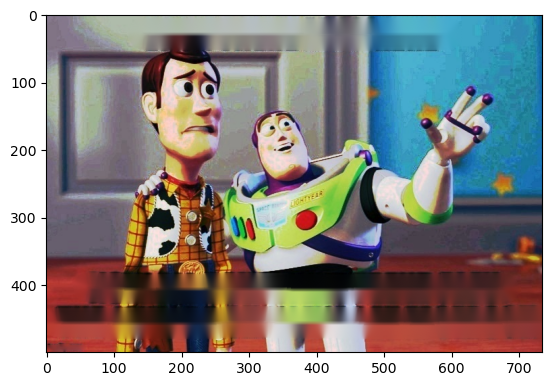

In [45]:
def Painting_image(image_location,pipeline):                       # THIS FUNCTION IS USED FOR PAINTING OVER THE TEXT
    image=keras_ocr.tools.read(image_location)                     # READING IMAGE WITH KERAS OCR
    text_boxes=pipeline.recognize([image])                         # THIS BASICALLY RETURNS A TUPLE OF WORDS WITH IT'S BLOCK
    mask=np.zeros(image.shape[:2],dtype="uint8")                   # CREATING A 2D MASK FOR COVERING THE TEXT
    for textbox in text_boxes[0]:                                  # IN EACH 2D TEXT BOX
        x0,y0=textbox[1][0]                                        # A BOX HAS FOUR SIDES SO GETTING THE CO-ORDINATES
        x1,y1=textbox[1][1] 
        x2,y2=textbox[1][2]
        x3,y3=textbox[1][3]
        xmid0,ymid0=Get_Mid_Point(x1,y1,x2,y2)                     # FINDING THE MID POINT
        xmid1,ymid1=Get_Mid_Point(x0,y0,x3,y3)                   
        Size=int(math.sqrt((x2-x1)**2+(y2-y1)**2))                 # DEFINING SIZE OF PAINT BRUSH
        cv2.line(mask,(xmid0,ymid0),(xmid1,ymid1),255,Size)        # GENERATING A LINE 
        painted_image=cv2.inpaint(image,mask,7,cv2.INPAINT_TELEA)  # PAINTING THE LINE
    return painted_image                                            # RETURN THE IMAGE
imag=Painting_image(data['image_name'][0],pipeline)                # CALLING THE FUNCTION
plt.imshow(imag)                                                   # DISPLAYING THE RESULT

In [46]:
counter=0                                                                 # TO KEEP TRACK OF PROCESSED IMAGES
for i in range(100):                                                      # NOW REPEAT IT FOR THE IMAGES
    image=Painting_image(data['image_name'][i],pipeline)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)                           # COLOR CONVERSION
    cv2.imwrite(os.path.join('Simple_Images/',data['image'][i]),image)
    counter+=1
    print("Processed image ",counter-1)                                   # PRINTING COUNT

Processed image  0
Processed image  1
Processed image  2
Processed image  3
Processed image  4
Processed image  5
Processed image  6
Processed image  7
Processed image  8
Processed image  9
Processed image  10
Processed image  11
Processed image  12
Processed image  13
Processed image  14
Processed image  15
Processed image  16
Processed image  17
Processed image  18
Processed image  19
Processed image  20
Processed image  21
Processed image  22
Processed image  23
Processed image  24
Processed image  25
Processed image  26
Processed image  27
Processed image  28
Processed image  29
Processed image  30
Processed image  31
Processed image  32
Processed image  33
Processed image  34
Processed image  35
Processed image  36
Processed image  37
Processed image  38
Processed image  39
Processed image  40
Processed image  41
Processed image  42
Processed image  43
Processed image  44
Processed image  45
Processed image  46
Processed image  47
Processed image  48
Processed image  49
Processed 

## 2- REMOVING BACKGROUND FROM IMAGES

### MY CONTRIBUTION:
HERE I HAVE USED THIS TECHNIQUE TO REMOVE THE BG FROM THE IMAGES, THE CODE FROM SCRATCH IS NOT PURELY MINE <br> BUT USING IT HERE IS MY CONTRIBUTION TO THIS PROBLEM.

In [47]:
counter=0                                                          # TO KEEP TRACK OF IMAGE 
for image_path in data['image_name'][:100]:
    print("Processing Image",counter)                              # PRINTING IT
    counter+=1
    input_image=Image.open(image_path)                             # OPENING AN IMAGE
    output_image=remove(input_image)                               # REMOVING BG
    output_path=os.path.join('No_Bg',os.path.basename(image_path)+'_no_background.png')
    output_image.save(output_path)                                 # SAVING IT

Processing Image 0
Processing Image 1
Processing Image 2
Processing Image 3
Processing Image 4
Processing Image 5
Processing Image 6
Processing Image 7
Processing Image 8
Processing Image 9
Processing Image 10
Processing Image 11
Processing Image 12
Processing Image 13
Processing Image 14
Processing Image 15
Processing Image 16
Processing Image 17
Processing Image 18
Processing Image 19
Processing Image 20
Processing Image 21
Processing Image 22
Processing Image 23
Processing Image 24
Processing Image 25
Processing Image 26
Processing Image 27
Processing Image 28
Processing Image 29
Processing Image 30
Processing Image 31
Processing Image 32
Processing Image 33
Processing Image 34
Processing Image 35
Processing Image 36
Processing Image 37
Processing Image 38
Processing Image 39
Processing Image 40
Processing Image 41
Processing Image 42
Processing Image 43
Processing Image 44
Processing Image 45
Processing Image 46
Processing Image 47
Processing Image 48
Processing Image 49
Processing

## 3- ADDING TEXT TO PLAIN IMAGES

### MY CONTRIBUTION:
HERE I HAVE USED THIS TECHNIQUE TO CREATE PICTURES WITH ONLY TEXT, THE IDEA IS MINE BUT OBVIOUSLY TOOK REFERENCE FROM OTHER SOURCES FOR IMPLEMENTATION.

In [52]:
counter=0
for index,text in enumerate(data['text_corrected'][:100]):
    print("Processing Image",counter)
    counter+=1
    image=Image.new('RGB',(1000,512),color='black')               # DRAWING AND IMAGE
    drawer=ImageDraw.Draw(image)                                  # SELECTING FONT AND EVERYTHING
    font=ImageFont.truetype("arial.ttf",12)
    drawer.text((10,100),text,fill='white',font=font)             # WRITING ON THE IMAGE
    image_path=os.path.join('Only_text',os.path.basename(data['image'][index])+'.png')
    image.save(image_path)                                        # SAVING IT

Processing Image 0
Processing Image 1
Processing Image 2
Processing Image 3
Processing Image 4
Processing Image 5
Processing Image 6
Processing Image 7
Processing Image 8
Processing Image 9
Processing Image 10
Processing Image 11
Processing Image 12
Processing Image 13
Processing Image 14
Processing Image 15
Processing Image 16
Processing Image 17
Processing Image 18
Processing Image 19
Processing Image 20
Processing Image 21
Processing Image 22
Processing Image 23
Processing Image 24
Processing Image 25
Processing Image 26
Processing Image 27
Processing Image 28
Processing Image 29
Processing Image 30
Processing Image 31
Processing Image 32
Processing Image 33
Processing Image 34
Processing Image 35
Processing Image 36
Processing Image 37
Processing Image 38
Processing Image 39
Processing Image 40
Processing Image 41
Processing Image 42
Processing Image 43
Processing Image 44
Processing Image 45
Processing Image 46
Processing Image 47
Processing Image 48
Processing Image 49
Processing

## 4-ADDING DIVERSITY TO DATASET

### MY CONTRIBUTION:
HERE I HAVE USED THIS TECHNIQUE TO REPLACE THE TEXT FROM THE IMAGES, I.E. CONFUSING THE MODELS.THE CODE FROM SCRATCH IS NOT PURELY MINE <br> BUT USING IT HERE IS MY CONTRIBUTION TO THIS PROBLEM.

In [53]:
def Word_Changer(text,mappings,label):                                # FUNCTION FOR MAPPING THE WORDS TO ITS ANTONYM
    for key,value in mappings.items():
        if key in text:
            text=text.replace(key,value)
    if label==1:                                                      # AND GIVING THE OPPOSITE LABELS
        label=2
    elif label==2:
        label=1
    else:
        label=3                                                      # SAME LABEL IN CASE OF NEUTRAL
    return text,label

In [54]:
def Font_Calculator(text,font,max_width,max_height):                # IN ORDER TO AVOID TEXT CUTOFF
    font_size=1                                                     # STARTING WITH 1
    (text_width,text_height),baseline=cv2.getTextSize(text,font,fontScale=font_size,thickness=1)
    while text_width>max_width or text_height>max_height:           # IF IT EXCEEDS THE FRAME OF IMAGE 
        font_size-=0.1                                              # DECREMENT BY 0.1
        (text_width,text_height),baseline=cv2.getTextSize(text,font,fontScale=font_size,thickness=1)
    return font_size                                                # RETURNING PERFECT FONT

In [55]:
counter=0                     
new_labels=[]                                                      # FOR STORING NEW LABELS AND TEXTS
new_texts=[]
for index,text in enumerate(data['text_corrected'][:100]):
    print("Processing Image",counter)
    counter+=1
    new_text,label=Word_Changer(text,word_mappings,labels[index]) # MAP THE WORD
    new_labels.append(label)                                      # APPEND THE LABELS
    new_texts.append(new_text)
    image_path=os.path.join('Simple_Images',os.path.basename(data['image'][index])) # READ THE IMAGE WITHOUT TEXT
    image=cv2.imread(image_path)                                                    # DEFINE MAX WIDTH ETC
    max_width=image.shape[1]
    max_height=image.shape[0]
    font=cv2.FONT_HERSHEY_SIMPLEX                                                   # DEFINE FONT
    font_size=Font_Calculator(new_text,font,max_width,max_height)                   # GET SIXE
    text_size,baseline=cv2.getTextSize(new_text,font,fontScale=font_size,thickness=1)
    cv2.putText(image,new_text,(10,10+text_size[1]),font,font_size,(255,0,0),thickness=1)# WRITE ON THE IMAGE
    output_path=os.path.join('more_context',os.path.basename(data['image'][index]))
    cv2.imwrite(output_path,image)  

Processing Image 0
Processing Image 1
Processing Image 2
Processing Image 3
Processing Image 4
Processing Image 5
Processing Image 6
Processing Image 7
Processing Image 8
Processing Image 9
Processing Image 10
Processing Image 11
Processing Image 12
Processing Image 13
Processing Image 14
Processing Image 15
Processing Image 16
Processing Image 17
Processing Image 18
Processing Image 19
Processing Image 20
Processing Image 21
Processing Image 22
Processing Image 23
Processing Image 24
Processing Image 25
Processing Image 26
Processing Image 27
Processing Image 28
Processing Image 29
Processing Image 30
Processing Image 31
Processing Image 32
Processing Image 33
Processing Image 34
Processing Image 35
Processing Image 36
Processing Image 37
Processing Image 38
Processing Image 39
Processing Image 40
Processing Image 41
Processing Image 42
Processing Image 43
Processing Image 44
Processing Image 45
Processing Image 46
Processing Image 47
Processing Image 48
Processing Image 49
Processing

# ANALYSING DIFFERENT VARIATIONS OF IMAGES
## VGG 16 FOR FEATURE EXTRACTION

### MY CONTRIBUTION:
HERE MY CONTRUBUTION IS TO CONDUCT COMPARATIVE ANALYSIS AMONG DIFFERENT VARIANTS OF IMAGES

In [56]:
model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))        # Load pre-trained VGG16 model
def extract_image_features(image_paths,batch_size=1):                           # BY DEFAULT BATCH SIZE IS KEPT 1
    image_features=[]                                                           # FOR STORING FEATURES
    for i in range(0,len(image_paths),batch_size):                              # STEP IS BATCH SIZE
        batch_image_paths=image_paths[i:i+batch_size]                           # DIVIDING PATHS INTO BATCHES
        batch_features=[]
        for img_path in batch_image_paths:                                      # FOR EACH IMAGE PATH
            img=image.load_img(img_path,target_size=(224,224))                  # LOAD THE IMAGE
            img=image.img_to_array(img)                                         # CONVERT TO ARRAY
            img=np.expand_dims(img,axis=0)                                      # EXPANDING DIMS
            img=preprocess_input(img)                                           # PREPROCESS IT
            img=model.predict(img)                                              # PREDICT IT
            batch_features.append(img.flatten())                                # ADD THE RESHAPED VECTOR
        image_features.extend(batch_features)                                   # ADD TO THE MAIN LIST
    return np.array(image_features)                                             # RETURN THE ARRAY OF FEATURES

## 1- IMAGES WITHOUT TEXT

In [57]:
image_paths=[]                                                                  # TO STORE PATHS
for i in data['image'][:100]:                                                   
    image_paths.append(r"Simple_Images/"+i)

In [59]:
from tensorflow.keras.preprocessing import image
Vga1=extract_image_features(image_paths)                                       # FEATURE EXTRACTION
X_image_train,X_image_test,y_train,y_test=train_test_split(Vga1,labels,test_size=0.45,random_state=52) # SPLITTING

1/1 [==============================] - 1s 737ms/step


In [60]:
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_image_train,y_train)                          # TRAINING MODEL
y_pred=SVM.predict(X_image_test)                        # TESTING IT
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 80.0 %


## 2-  Images with text

In [61]:
image_paths2=[]                                        # SAME STEPS
for i in data['image_name'][:100]:
    image_paths2.append(i)

In [62]:
Vga2=extract_image_features(image_paths2)
X_image_train,X_image_test,y_train,y_test=train_test_split(Vga2,labels,test_size=0.45,random_state=52)

1/1 [==============================] - 1s 613ms/step


In [63]:
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_image_train,y_train)
y_pred=SVM.predict(X_image_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 80.0 %


## 3- ONLY TEXT IMAGES

In [64]:
image_paths3=[]
for i in data['image'][:100]:
    image_paths3.append(r"Only_text/"+i+".png")

In [65]:
Vga3=extract_image_features(image_paths3)
X_image_train,X_image_test,y_train,y_test=train_test_split(Vga3,labels,test_size=0.45,random_state=52)

1/1 [==============================] - 1s 906ms/step


In [66]:
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_image_train,y_train)
y_pred=SVM.predict(X_image_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 73.33333333333333 %


## 4- WITH ADDITIONAL CONTEXT 

In [67]:
More_labels=pd.concat([labels,pd.Series(new_labels)],ignore_index=True)
for i in range(100):
    image_paths2.append(r"more_context/"+data['image'][i])

In [68]:
Vga4=extract_image_features(image_paths2)
X_image_train,X_image_test,y_train,y_test=train_test_split(Vga4,More_labels,test_size=0.45,random_state=52)

1/1 [==============================] - 1s 920ms/step


In [69]:
SVM=SVC(kernel='linear',C=3)
SVM.fit(X_image_train,y_train)
y_pred=SVM.predict(X_image_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 65.55555555555556 %


PERFORMANCE LOWERED AS THE MODEL'S IN CAPABILITY OF DISTINGUISHING BETWEEN LABELS DECREASES 

## 5- IMAGES WITHOUT BACKGROUND

In [70]:
image_paths4=[]
for i in data['image'][:100]:
    image_paths4.append(r"No_Bg/"+i+"_no_background.png")

In [71]:
Vga5=extract_image_features(image_paths4)
X_image_train,X_image_test,y_train,y_test=train_test_split(Vga5,labels,test_size=0.45,random_state=52)

1/1 [==============================] - 1s 959ms/step


In [72]:
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_image_train,y_train)
y_pred=SVM.predict(X_image_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 77.77777777777779 %


### COMBINING THE FEATURES

In [73]:
combined_features_vgg=np.hstack([Vga1,Vga2,Vga3,Vga5])
X_image_train,X_image_test,y_train,y_test=train_test_split(combined_features_vgg,labels,test_size=0.45,random_state=52)
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_image_train,y_train)
y_pred=SVM.predict(X_image_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 80.0 %


Combined Accuracy is high

# ANALYSING DIFFERENT VARIATIONS OF IMAGES
## WITH COLOR HISTOGRAMS

### MY CONTRIBUTION:
HERE MY CONTRUBUTION IS TO CONDUCT COMPARATIVE ANALYSIS AMONG DIFFERENT VARIANTS OF IMAGES

In [74]:
def Get_Colour_histograms(image_paths):                                     # TAKING IMAGE PATCHES LIST AS AN INPUT
    Color_histograms=[]                                                     # FOR STORING RESULTS
    for image in image_paths:                                               # FOR EACH Image
        img=cv2.imread(image)
        hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)                             # CONVERT TO HSV
        hist=cv2.calcHist([hsv],[0,1,2],None,[8,8,8],[0,180,0,256,0,256])
        hist=cv2.normalize(hist,hist).flatten()                             # HISTOGRAM CALCULATION AND NORMALIZATION
        Color_histograms.append(hist)                                       
    return Color_histograms                                                 # RETURNING THE LIST

## 1- IMAGES WITHOUT TEXT

In [75]:
Color_histograms1=Get_Colour_histograms(image_paths)
X_train,X_test,y_train,y_test=train_test_split(Color_histograms1,labels,test_size=0.45,random_state=52)
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_train,y_train)
y_pred=SVM.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 73.33333333333333 %


## 2- NORMAL IMAGES WITH ADDITIONAL CONTEXT

In [79]:
Color_histograms2=Get_Colour_histograms(image_paths2)
X_train,X_test,y_train,y_test=train_test_split(Color_histograms2,More_labels,test_size=0.45,random_state=52)
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_train,y_train)
y_pred=SVM.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 61.111111111111114 %


## 3- ONLY TEXTUAL IMAGES

In [81]:
Color_histograms3=Get_Colour_histograms(image_paths3)
X_train,X_test,y_train,y_test=train_test_split(Color_histograms3,labels,test_size=0.45,random_state=52)
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_train,y_train)
y_pred=SVM.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 80.0 %


## 4- WITHOUT BG IMAGES

In [82]:
Color_histograms4=Get_Colour_histograms(image_paths4)
X_train,X_test,y_train,y_test=train_test_split(Color_histograms4,labels,test_size=0.45,random_state=52)
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_train,y_train)
y_pred=SVM.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 80.0 %


## 5- NORMAL IMAGES

In [83]:
image_paths2=[]
for i in data['image_name'][:100]:
    image_paths2.append(i)
Color_histograms2=Get_Colour_histograms(image_paths2)
X_train,X_test,y_train,y_test=train_test_split(Color_histograms2,labels,test_size=0.45,random_state=52)
SVM=SVC(kernel='rbf',C=3)
SVM.fit(X_train,y_train)
y_pred=SVM.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 75.55555555555556 %


### COMBING FEATURES

In [84]:
combined_features=np.hstack([Color_histograms1,Color_histograms2,Color_histograms3,Color_histograms4])
X_image_train,X_image_test,y_train,y_test=train_test_split(combined_features,labels,test_size=0.45,random_state=52)
SVM=SVC(kernel='linear',C=3)
SVM.fit(X_image_train,y_train)
y_pred=SVM.predict(X_image_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 68.88888888888889 %


WITH VGG16 FEATURES:
<br> PREVIOUSLY
<br> VGG16 Accuracy: 73.33333333333333 %
<br> COLOR HIST Accuracy: 77.77777777777779 %
### VGG + COLOR HIST

In [85]:
combined_features=np.hstack([Vga1,Vga2,Vga3,Vga5,Color_histograms1,Color_histograms2,Color_histograms3,Color_histograms4])
X_image_train,X_image_test,y_train,y_test=train_test_split(combined_features,labels,test_size=0.125,random_state=52)
SVM=SVC(kernel='linear',C=3)
SVM.fit(X_image_train,y_train)
y_pred=SVM.predict(X_image_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 92.3076923076923 %


With more context , i.e. with a more extensive feature space accuracy has improved

# USING ATTENTION ON IMAGES ON COLOR HISTOGRAMS 

### MY CONTRIBUTION:
THE IDEA TO IT HERE WAS OURS HENCE THAT IS OUR CONTRIBUTION

In [86]:
class ATTENTION_CLASS(nn.Module):                                              # CREATING A CLASS
    def __init__(self,input_neurons=512,hidden_neurons=10,output_neurons=100): # SETTING UP DEFAULT PARAMETERS
        super(ATTENTION_CLASS,self).__init__()
        self.Layer1=nn.Linear(input_neurons,hidden_neurons)                    # INITIALIZATION of LAYERS AND ATTENTION
        self.Layer2=nn.Linear(hidden_neurons,output_neurons)                    # WEIGHTS
        self.Attention_Weights=nn.Parameter(torch.randn(hidden_neurons,1))     
    def forward(self,Color_hists):
        Color_hists_tensor=torch.stack(Color_hists)                            # STACKING AND CONVERTING HISTS TO TENSORS
        result=self.Layer1(Color_hists_tensor)                                 # OUTPUT FROM LAYER 1
        result=F.relu(result)                                                  # ACTIVATION APPLICATION
        Attention_Scores=torch.matmul(result,self.Attention_Weights)           # CALCULATING SCORES
        Attention_Weights=F.softmax(Attention_Scores,dim=0)                    # GETTING WEIGHTS
        Context=torch.sum(result*Attention_Weights,dim=0)                      # KEEPING CONTEXT
        result=self.Layer2(Context)                                            # PASSING TO LAYER 2 AND RETURNING RESULT
        return result                                                          # WE WILL USE PYTORCH'S OWN BACK PROP

### Color hist 1:

In [104]:
X_train,X_test,y_train,y_test=train_test_split(Color_histograms1,labels,test_size=0.5,random_state=52)
hists=[]
for i in X_train:                                                             # TRANSFORMING DATA TO TENSORS
    hists.append(torch.tensor(i))
Labels_tensor=torch.tensor(y_train,dtype=torch.float32)

In [105]:
ATTENTION_OBJ=ATTENTION_CLASS(512,10,50)                                       # INITIALIZING CLASS OBJECT
criterion=nn.BCEWithLogitsLoss()                                               # FOR MULTI-CLASS LOSS
optimizer=torch.optim.Adam(ATTENTION_OBJ.parameters(),lr=0.01)                 # DEFINING OPTIMIZER
for epoch in range(100):
    optimizer.zero_grad()                                                      # SETTING GRAD TO 0
    result=ATTENTION_OBJ(hists)                                                # FORWARD PASSING
    loss=criterion(result,Labels_tensor)                                       # LOSS
    loss.backward()                                                            # BACK PROP
    optimizer.step()                                                           # UPDATING WEIGHTS
    y_pred=(result>0.5)                                                        # GETTING CORRECT LABELS
    correct_results=(y_pred==Labels_tensor).sum().item()
    if epoch%10==0:
        print(f'Epoch:{epoch} of {10} \n\t Loss:{loss.item():.4f}\t\tAccuracy:{(correct_results/Labels_tensor.numel())*100}%')

Epoch:0 of 10 
	 Loss:0.6715		Accuracy:0.0%
Epoch:10 of 10 
	 Loss:0.1060		Accuracy:32.0%
Epoch:20 of 10 
	 Loss:-1.4800		Accuracy:57.99999999999999%
Epoch:30 of 10 
	 Loss:-4.2517		Accuracy:57.99999999999999%
Epoch:40 of 10 
	 Loss:-8.7333		Accuracy:57.99999999999999%
Epoch:50 of 10 
	 Loss:-15.1782		Accuracy:57.99999999999999%
Epoch:60 of 10 
	 Loss:-23.6056		Accuracy:57.99999999999999%
Epoch:70 of 10 
	 Loss:-34.2073		Accuracy:57.99999999999999%
Epoch:80 of 10 
	 Loss:-47.0866		Accuracy:57.99999999999999%
Epoch:90 of 10 
	 Loss:-62.3040		Accuracy:57.99999999999999%


In [107]:
hists=[]
for i in X_test:                                                              # TRANSFORMING DATA TO TENSORS
    hists.append(torch.tensor(i))
Labels_tensor=torch.tensor(y_test,dtype=torch.float32)

In [108]:
ATTENTION_OBJ.eval()
with torch.no_grad():
    result=ATTENTION_OBJ(hists)                                                # FORWARD PASSING
    y_pred=(result>0.5)                                                        # GETTING CORRECT LABELS
    correct_results=(y_pred==Labels_tensor).sum().item()
    print(f'\tAccuracy:{(correct_results/Labels_tensor.numel())*100}%')

	Accuracy:57.99999999999999%


### Color hist 2:

In [110]:
X_train,X_test,y_train,y_test=train_test_split(Color_histograms2,labels,test_size=0.5,random_state=62)
hists=[]
for i in X_train:                                                             # TRANSFORMING DATA TO TENSORS
    hists.append(torch.tensor(i))
Labels_tensor=torch.tensor(y_train,dtype=torch.float32)
ATTENTION_OBJ=ATTENTION_CLASS(512,10,50)                                       # INITIALIZING CLASS OBJECT
criterion=nn.BCEWithLogitsLoss()                                               # FOR MULTI-CLASS LOSS
optimizer=torch.optim.Adam(ATTENTION_OBJ.parameters(),lr=0.01)                 # DEFINING OPTIMIZER
for epoch in range(100):
    optimizer.zero_grad()                                                      # SETTING GRAD TO 0
    result=ATTENTION_OBJ(hists)                                                # FORWARD PASSING
    loss=criterion(result,Labels_tensor)                                       # LOSS
    loss.backward()                                                            # BACK PROP
    optimizer.step()                                                           # UPDATING WEIGHTS
    y_pred=(result>0.5)                                                        # GETTING CORRECT LABELS
    correct_results=(y_pred==Labels_tensor).sum().item()
    if epoch%10==0:
        print(f'Epoch:{epoch} of {10} \n\t Loss:{loss.item():.4f}\t\tAccuracy:{(correct_results/Labels_tensor.numel())*100}%')
hists=[]
for i in X_test:                                                              # TRANSFORMING DATA TO TENSORS
    hists.append(torch.tensor(i))
Labels_tensor=torch.tensor(y_test,dtype=torch.float32)

ATTENTION_OBJ.eval()
with torch.no_grad():
    result=ATTENTION_OBJ(hists)                                                # FORWARD PASSING
    y_pred=(result>0.5)                                                        # GETTING CORRECT LABELS
    correct_results=(y_pred==Labels_tensor).sum().item()
    print(f'\tAccuracy:{(correct_results/Labels_tensor.numel())*100}%')

Epoch:0 of 10 
	 Loss:0.7429		Accuracy:0.0%
Epoch:10 of 10 
	 Loss:0.2537		Accuracy:40.0%
Epoch:20 of 10 
	 Loss:-0.8501		Accuracy:78.0%
Epoch:30 of 10 
	 Loss:-2.5317		Accuracy:78.0%
Epoch:40 of 10 
	 Loss:-5.1838		Accuracy:78.0%
Epoch:50 of 10 
	 Loss:-9.1079		Accuracy:78.0%
Epoch:60 of 10 
	 Loss:-14.5511		Accuracy:78.0%
Epoch:70 of 10 
	 Loss:-21.5711		Accuracy:78.0%
Epoch:80 of 10 
	 Loss:-30.1020		Accuracy:78.0%
Epoch:90 of 10 
	 Loss:-40.1884		Accuracy:78.0%
	Accuracy:78.0%


### color hist 3:

In [111]:
X_train,X_test,y_train,y_test=train_test_split(Color_histograms3,labels,test_size=0.5,random_state=12)
hists=[]
for i in X_train:                                                             # TRANSFORMING DATA TO TENSORS
    hists.append(torch.tensor(i))
Labels_tensor=torch.tensor(y_train,dtype=torch.float32)
ATTENTION_OBJ=ATTENTION_CLASS(512,10,50)                                       # INITIALIZING CLASS OBJECT
criterion=nn.BCEWithLogitsLoss()                                               # FOR MULTI-CLASS LOSS
optimizer=torch.optim.Adam(ATTENTION_OBJ.parameters(),lr=0.01)                 # DEFINING OPTIMIZER
for epoch in range(100):
    optimizer.zero_grad()                                                      # SETTING GRAD TO 0
    result=ATTENTION_OBJ(hists)                                                # FORWARD PASSING
    loss=criterion(result,Labels_tensor)                                       # LOSS
    loss.backward()                                                            # BACK PROP
    optimizer.step()                                                           # UPDATING WEIGHTS
    y_pred=(result>0.5)                                                        # GETTING CORRECT LABELS
    correct_results=(y_pred==Labels_tensor).sum().item()
    if epoch%10==0:
        print(f'Epoch:{epoch} of {10} \n\t Loss:{loss.item():.4f}\t\tAccuracy:{(correct_results/Labels_tensor.numel())*100}%')
hists=[]
for i in X_test:                                                              # TRANSFORMING DATA TO TENSORS
    hists.append(torch.tensor(i))
Labels_tensor=torch.tensor(y_test,dtype=torch.float32)

ATTENTION_OBJ.eval()
with torch.no_grad():
    result=ATTENTION_OBJ(hists)                                                # FORWARD PASSING
    y_pred=(result>0.5)                                                        # GETTING CORRECT LABELS
    correct_results=(y_pred==Labels_tensor).sum().item()
    print(f'\tAccuracy:{(correct_results/Labels_tensor.numel())*100}%')

Epoch:0 of 10 
	 Loss:0.6501		Accuracy:0.0%
Epoch:10 of 10 
	 Loss:0.5109		Accuracy:0.0%
Epoch:20 of 10 
	 Loss:0.3365		Accuracy:10.0%
Epoch:30 of 10 
	 Loss:0.1115		Accuracy:34.0%
Epoch:40 of 10 
	 Loss:-0.1649		Accuracy:54.0%
Epoch:50 of 10 
	 Loss:-0.4865		Accuracy:66.0%
Epoch:60 of 10 
	 Loss:-0.8445		Accuracy:66.0%
Epoch:70 of 10 
	 Loss:-1.2324		Accuracy:66.0%
Epoch:80 of 10 
	 Loss:-1.6501		Accuracy:66.0%
Epoch:90 of 10 
	 Loss:-2.1026		Accuracy:66.0%
	Accuracy:66.0%


### Color hist 4:

In [112]:
X_train,X_test,y_train,y_test=train_test_split(Color_histograms4,labels,test_size=0.5,random_state=12)
hists=[]
for i in X_train:                                                             # TRANSFORMING DATA TO TENSORS
    hists.append(torch.tensor(i))
Labels_tensor=torch.tensor(y_train,dtype=torch.float32)
ATTENTION_OBJ=ATTENTION_CLASS(512,10,50)                                       # INITIALIZING CLASS OBJECT
criterion=nn.BCEWithLogitsLoss()                                               # FOR MULTI-CLASS LOSS
optimizer=torch.optim.Adam(ATTENTION_OBJ.parameters(),lr=0.01)                 # DEFINING OPTIMIZER
for epoch in range(100):
    optimizer.zero_grad()                                                      # SETTING GRAD TO 0
    result=ATTENTION_OBJ(hists)                                                # FORWARD PASSING
    loss=criterion(result,Labels_tensor)                                       # LOSS
    loss.backward()                                                            # BACK PROP
    optimizer.step()                                                           # UPDATING WEIGHTS
    y_pred=(result>0.5)                                                        # GETTING CORRECT LABELS
    correct_results=(y_pred==Labels_tensor).sum().item()
    if epoch%10==0:
        print(f'Epoch:{epoch} of {10} \n\t Loss:{loss.item():.4f}\t\tAccuracy:{(correct_results/Labels_tensor.numel())*100}%')
hists=[]
for i in X_test:                                                              # TRANSFORMING DATA TO TENSORS
    hists.append(torch.tensor(i))
Labels_tensor=torch.tensor(y_test,dtype=torch.float32)

ATTENTION_OBJ.eval()
with torch.no_grad():
    result=ATTENTION_OBJ(hists)                                                # FORWARD PASSING
    y_pred=(result>0.5)                                                        # GETTING CORRECT LABELS
    correct_results=(y_pred==Labels_tensor).sum().item()
    print(f'\tAccuracy:{(correct_results/Labels_tensor.numel())*100}%')

Epoch:0 of 10 
	 Loss:0.6325		Accuracy:0.0%
Epoch:10 of 10 
	 Loss:0.3466		Accuracy:8.0%
Epoch:20 of 10 
	 Loss:-0.2140		Accuracy:62.0%
Epoch:30 of 10 
	 Loss:-1.0670		Accuracy:66.0%
Epoch:40 of 10 
	 Loss:-2.3699		Accuracy:66.0%
Epoch:50 of 10 
	 Loss:-4.5686		Accuracy:66.0%
Epoch:60 of 10 
	 Loss:-7.5957		Accuracy:66.0%
Epoch:70 of 10 
	 Loss:-11.2875		Accuracy:66.0%
Epoch:80 of 10 
	 Loss:-15.7018		Accuracy:66.0%
Epoch:90 of 10 
	 Loss:-20.8848		Accuracy:66.0%
	Accuracy:66.0%


# Part 4: Multi-Modal Analysis

Mostly used approach

# Approach 1:

In [120]:
                                                                  #Combining text and image data
X_text_train, X_text_test, y_train, y_test = train_test_split(meme_texts_filled, labels, test_size=0.45, random_state=52)
X_image_train, X_image_test, _, _ = train_test_split(image_paths, labels, test_size=0.45, random_state=52)

vectorizer=TfidfVectorizer()                                        #Text featurs
X_text_train_vectorized=vectorizer.fit_transform(X_text_train)
X_text_test_vectorized=vectorizer.transform(X_text_test)

In [125]:
model=VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))        #usingpre-trained VGG16 model

def extract_image_features(image_paths, batch_size=1):
    features=[]
    for i in range(0, len(image_paths), batch_size):
        batch_image_paths=image_paths[i:i+batch_size]
        batch_features=[]
        for img_path in batch_image_paths:
            img=image.load_img(img_path, target_size=(224, 224))
            img_array=image.img_to_array(img)
            img_array=np.expand_dims(img_array, axis=0)
            img_array=preprocess_input(img_array)
            feature=model.predict(img_array)
            batch_features.append(feature.flatten())                                     #flateening the feature vector
        features.extend(batch_features)
    return np.array(features)

In [126]:
#training and testing img
X_image_train_features=extract_image_features(X_image_train)
X_image_test_features=extract_image_features(X_image_test)

X_train_combined=np.concatenate((X_text_train_vectorized.toarray(), X_image_train_features), axis=1) # merging features
X_test_combined=np.concatenate((X_text_test_vectorized.toarray(), X_image_test_features), axis=1)

classifier=AdaBoostClassifier(random_state=15)
classifier.fit(X_train_combined, y_train)

1/1 [==============================] - 0s 419ms/step


AdaBoostClassifier(random_state=15)

# -------------> Approach 2: Multi Modal Analysis using NN

In [132]:
label_map={'very_negative': 0, 'negative': 1, 'neutral': 2, 'positive': 3, 'very_positive': 4}
labels=meme_data["overall_sentiment"].replace(label_map)[:100].astype(int)              #Convert labels to integers
split_index=int(len(meme_texts) * 0.55)

X_text_train, X_text_test, y_train, y_test=train_test_split(meme_texts, labels, test_size=0.45, random_state=52)
X_image_train, X_image_test=image_paths[:split_index], image_paths[split_index:]
vectorizer=TfidfVectorizer()
X_text_train_vectorized=vectorizer.fit_transform(X_text_train)
X_text_test_vectorized=vectorizer.transform(X_text_test)

model=VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
X_image_train_features=extract_image_features(X_image_train)
X_image_test_features=extract_image_features(X_image_test)
X_train_combined=[X_text_train_vectorized.toarray(), X_image_train_features]
X_test_combined=[X_text_test_vectorized.toarray(), X_image_test_features]

text_input=Input(shape=(X_text_train_vectorized.shape[1],), name='text_input')        # NN
image_input=Input(shape=(X_image_train_features.shape[1],), name='image_input')
text_dense=Dense(256, activation='relu')(text_input)
image_dense=Dense(256, activation='relu')(image_input)
combined=concatenate([text_dense, image_dense])
output=Dense(len(set(labels)), activation='softmax')(combined)
model=Model(inputs=[text_input, image_input], outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_combined, y_train, batch_size=64, epochs=10, validation_data=(X_test_combined, y_test))
y_pred=model.predict([X_text_test_vectorized.toarray(), X_image_test_features])
y_pred_classes=np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 415ms/step
Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 9.8365 - accuracy: 0.2909 - val_loss: 105.6488 - val_accuracy: 0.1556
Epoch 2/10
1/1 [==============================] - 0s 161ms/step - loss: 38.5808 - accuracy: 0.4545 - val_loss: 53.2317 - val_accuracy: 0.1778
Epoch 3/10
1/1 [==============================] - 0s 181ms/step - loss: 7.4228 - accuracy: 0.7636 - val_loss: 23.2982 - val_accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 0s 162ms/step - loss: 0.6170 - accuracy: 0.9818 - val_loss: 20.3913 - val_accuracy: 0.5778
Epoch 5/10
1/1 [==============================] - 0s 156ms/step - loss: 0.8228 - accuracy: 0.9455 - val_loss: 25.7962 - val_accuracy: 0.6222
Epoch 6/10
1/1 [==============================] - 0s 179ms/step - loss: 0.3514 - accuracy: 0.9455 - val_loss: 29.2823 - val_accuracy: 0.6444
Epoch 7/10
1/1 [==============================] - 0s 172ms/step - loss: 0.2321 - accuracy: 0.9636 - va

In [133]:
accuracy=accuracy_score(y_test,y_pred_classes)
print("Test Accuracy:",accuracy)

Test Accuracy: 0.6222222222222222


# Part 5:

# My Contribution

PURELY MY CONTRIBUTION: Applying Attention mechanism on memes to see which input data is more relevant in classifying a MEME

#  Attention: Focus on Relevant parts of the Input Data for Predictions

In [160]:

labels_adjusted=labels-1
text_input=Input(shape=(X_text_train_vectorized.shape[1],),name='text_input')           #inputs
image_input=Input(shape=(X_image_train_features.shape[1],),name='image_input')
text_dense=Dense(256, activation='relu')(text_input)
image_dense=Dense(256, activation='relu')(image_input)
text_attention=Attention()([text_dense, image_dense])

combined=concatenate([text_attention, image_dense])                                       #dense layers
output=Dense(len(set(labels_adjusted)), activation='softmax')(combined)
model_with_attention=Model(inputs=[text_input, image_input], outputs=output)
model_with_attention.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
X_train_combined=[X_text_train_vectorized.toarray(), X_image_train_features]
X_test_combined=[X_text_test_vectorized.toarray(), X_image_test_features]

model_with_attention.fit(X_train_combined, labels_adjusted[:len(X_train_combined[0])],batch_size=64,epochs=10,validation_data=(X_test_combined, labels_adjusted[len(X_train_combined[0]):]))
y_pred_with_attention=model_with_attention.predict(X_test_combined)
y_pred_classes_with_attention=np.argmax(y_pred_with_attention, axis=1)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 5.8299 - accuracy: 0.4364 - val_loss: 83.9747 - val_accuracy: 0.6889
Epoch 2/10
1/1 [==============================] - 0s 161ms/step - loss: 58.2602 - accuracy: 0.7091 - val_loss: 73.7203 - val_accuracy: 0.6889
Epoch 3/10
1/1 [==============================] - 0s 175ms/step - loss: 41.5146 - accuracy: 0.4545 - val_loss: 105.5195 - val_accuracy: 0.6889
Epoch 4/10
1/1 [==============================] - 0s 172ms/step - loss: 14.8933 - accuracy: 0.8727 - val_loss: 123.5925 - val_accuracy: 0.6889
Epoch 5/10
1/1 [==============================] - 0s 167ms/step - loss: 19.4545 - accuracy: 0.9091 - val_loss: 132.8526 - val_accuracy: 0.6889
Epoch 6/10
1/1 [==============================] - 0s 154ms/step - loss: 18.5368 - accuracy: 0.8909 - val_loss: 140.3778 - val_accuracy: 0.6889
Epoch 7/10
1/1 [==============================] - 0s 178ms/step - loss: 17.8835 - accuracy: 0.9455 - val_loss: 144.3370 - val_accuracy: 0.6889
Epoch

In [161]:
accuracy=np.mean(y_pred_classes_with_attention==labels_adjusted[len(X_train_combined[0]):])
print("Accuracy:",accuracy)

Accuracy: 0.6888888888888889


2/2 [==============================] - 0s 13ms/step


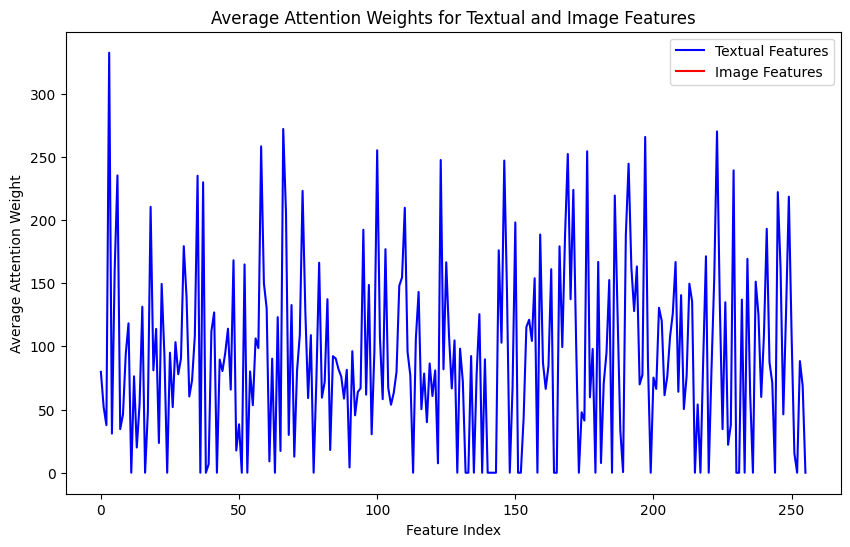

In [162]:
                                          #Extract attention weights model
attention_weights_model=Model(inputs=model_with_attention.input, outputs=model_with_attention.layers[4].output) #Attention() is the 5th layer
attention_weights=attention_weights_model.predict(X_train_combined)

#attention_weights are a tensor where the first part corresponds to text and the second to image
attention_weights_text=attention_weights[:, :text_dense.shape[1]]
attention_weights_image=attention_weights[:, text_dense.shape[1]:]
avg_attention_weights_text=np.mean(attention_weights_text, axis=0)        #avg attention weights for textual features
avg_attention_weights_image=np.mean(attention_weights_image, axis=0)             #for ImaGE

plt.figure(figsize=(10, 6))
plt.plot(avg_attention_weights_text, label='Textual Features', color='blue')       #Attention weights plott
plt.plot(avg_attention_weights_image, label='Image Features', color='red')
plt.title("Average Attention Weights for Textual and Image Features")
plt.xlabel("Feature Index")
plt.ylabel("Average Attention Weight")
plt.legend()
plt.show()
# This shows mostly texual features were given Most of the importance

# END